# Problem Statement

Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression

In [47]:
flight = pd.read_excel("Flight_training.xlsx")
flight

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [48]:
flight.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [49]:
flight.sample()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
6049,Jet Airways,24/03/2019,Kolkata,Banglore,CCU → BOM → BLR,06:30,16:20,9h 50m,1 stop,No info,13339


In [51]:
flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [52]:
flight['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [53]:
testing = pd.read_excel("Flight_testing.xlsx")
testing

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [54]:
testing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


<AxesSubplot:>

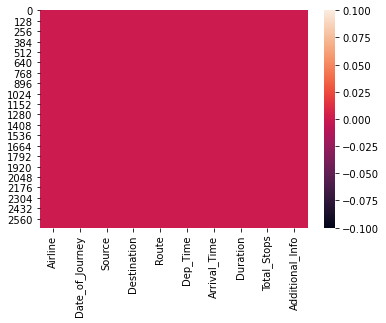

In [55]:
sns.heatmap(testing.isnull())

# Data Cleaning

In [56]:
# Drop some column
flight.drop(['Date_of_Journey'], axis =1, inplace =True)
flight.drop(['Dep_Time'], axis =1, inplace = True)
flight.drop(['Arrival_Time'], axis=1, inplace = True)
flight.drop(['Additional_Info'], axis =1, inplace =True)

In [57]:
flight

,Airline,Source,Destination,Route,Duration,Total_Stops,Price
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,3897
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,7662
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,13882
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,6218
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,13302
...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,2h 30m,non-stop,4107
10679,Air India,Kolkata,Banglore,CCU → BLR,2h 35m,non-stop,4145
10680,Jet Airways,Banglore,Delhi,BLR → DEL,3h,non-stop,7229
10681,Vistara,Banglore,New Delhi,BLR → DEL,2h 40m,non-stop,12648


In [58]:
flight.isnull().sum()

Airline        0
Source         0
Destination    0
Route          1
Duration       0
Total_Stops    1
Price          0
dtype: int64

<AxesSubplot:>

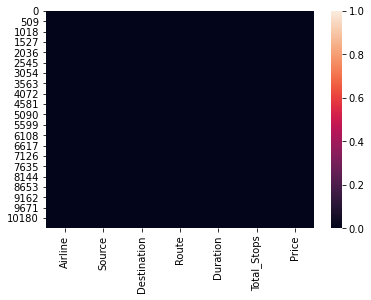

In [59]:
sns.heatmap(flight.isnull())

In [60]:
testing.drop(['Arrival_Time'], axis =1, inplace = True)

In [61]:
testing.drop(['Additional_Info'], axis =1, inplace = True)

In [63]:
testing.drop(['Date_of_Journey'], axis =1, inplace =True)
testing.drop(['Dep_Time'], axis =1, inplace = True)

In [64]:
testing

,Airline,Source,Destination,Route,Duration,Total_Stops
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10h 55m,1 stop
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,4h,1 stop
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,23h 45m,1 stop
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,13h,1 stop
4,Air Asia,Banglore,Delhi,BLR → DEL,2h 50m,non-stop
...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,CCU → DEL → BLR,23h 55m,1 stop
2667,IndiGo,Kolkata,Banglore,CCU → BLR,2h 35m,non-stop
2668,Jet Airways,Delhi,Cochin,DEL → BOM → COK,6h 35m,1 stop
2669,Air India,Delhi,Cochin,DEL → BOM → COK,15h 15m,1 stop


In [65]:
# Apply Label Encoder
le = LabelEncoder()
list1 = ['Airline', 'Source', 'Destination', 'Route', 'Duration', 'Total_Stops']
for var in list1:
    flight[var] = le.fit_transform(flight[var].astype(str))

In [66]:
flight

,Airline,Source,Destination,Route,Duration,Total_Stops,Price
0,3,0,5,18,240,5,3897
1,1,3,0,84,336,1,7662
2,4,2,1,118,106,1,13882
3,3,3,0,91,311,0,6218
4,3,0,5,29,303,0,13302
...,...,...,...,...,...,...,...
10678,0,3,0,64,236,5,4107
10679,1,3,0,64,237,5,4145
10680,4,0,2,18,280,5,7229
10681,10,0,5,18,238,5,12648


In [68]:
list2 = ['Airline', 'Source', 'Destination', 'Route', 'Duration', 'Total_Stops']
for test in list2:
    testing[test] = le.fit_transform(testing[test].astype(str))

In [69]:
testing

,Airline,Source,Destination,Route,Duration,Total_Stops
0,4,2,1,76,10,0
1,3,3,0,65,248,0
2,4,2,1,76,148,0
3,6,2,1,76,36,0
4,0,0,2,16,216,4
...,...,...,...,...,...,...
2666,1,3,0,51,150,0
2667,3,3,0,43,213,4
2668,4,2,1,76,278,0
2669,1,2,1,76,60,0


# Summary Statistics

In [70]:
flight.describe()

,Airline,Source,Destination,Route,Duration,Total_Stops,Price
count,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000
mean,3.965927,1.952261,1.436113,74.825143,194.069269,1.785266,9087.064121
std,2.352155,1.177221,1.474782,36.730924,108.620556,2.268105,4611.359167
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1759.000000
25%,3.000000,2.000000,0.000000,48.000000,106.000000,0.000000,5277.000000
50%,4.000000,2.000000,1.000000,73.000000,233.000000,0.000000,8372.000000
75%,4.000000,3.000000,2.000000,104.000000,280.000000,5.000000,12373.000000
max,11.000000,4.000000,5.000000,128.000000,367.000000,5.000000,79512.000000


In [71]:
testing.describe()

,Airline,Source,Destination,Route,Duration,Total_Stops
count,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000
mean,3.972669,1.961438,1.432797,54.356421,169.453014,1.422688
std,2.295657,1.184328,1.467971,27.128993,93.907162,1.795728
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,2.000000,0.000000,33.000000,91.000000,0.000000
50%,4.000000,2.000000,1.000000,51.000000,209.000000,0.000000
75%,6.000000,3.000000,2.000000,76.000000,241.000000,4.000000
max,10.000000,4.000000,5.000000,99.000000,319.000000,4.000000


In [72]:
flight.skew()

Airline        0.731095
Source        -0.424054
Destination    1.244169
Route         -0.501909
Duration      -0.213427
Total_Stops    0.668085
Price          1.812552
dtype: float64

In [73]:
testing.skew()

Airline        0.483882
Source        -0.424997
Destination    1.263630
Route         -0.281807
Duration      -0.275404
Total_Stops    0.672623
dtype: float64

# EDA

<AxesSubplot:>

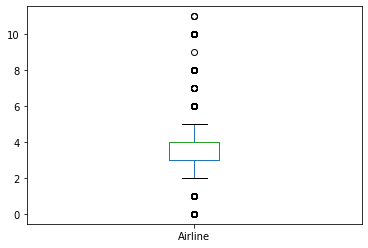

In [74]:
flight['Airline'].plot.box()

<AxesSubplot:>

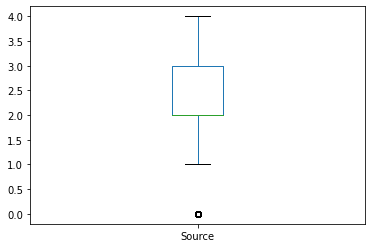

In [75]:
flight['Source'].plot.box()

<AxesSubplot:>

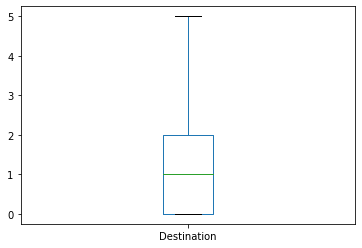

In [76]:
flight['Destination'].plot.box()

<AxesSubplot:>

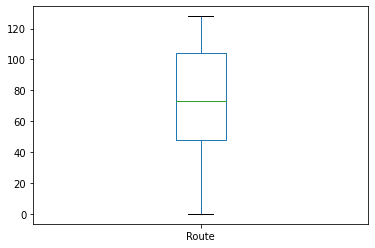

In [77]:
flight['Route'].plot.box()

<AxesSubplot:>

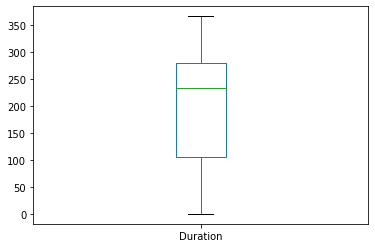

In [78]:
flight['Duration'].plot.box()

<AxesSubplot:>

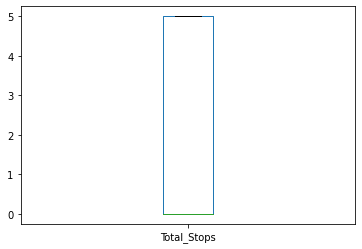

In [79]:
flight['Total_Stops'].plot.box()

<AxesSubplot:>

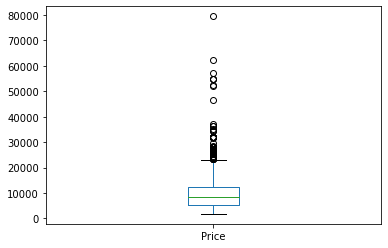

In [80]:
flight['Price'].plot.box()

Airline           AxesSubplot(0.125,0.536818;0.168478x0.343182)
Source         AxesSubplot(0.327174,0.536818;0.168478x0.343182)
Destination    AxesSubplot(0.529348,0.536818;0.168478x0.343182)
Route          AxesSubplot(0.731522,0.536818;0.168478x0.343182)
Duration             AxesSubplot(0.125,0.125;0.168478x0.343182)
Total_Stops       AxesSubplot(0.327174,0.125;0.168478x0.343182)
Price             AxesSubplot(0.529348,0.125;0.168478x0.343182)
dtype: object

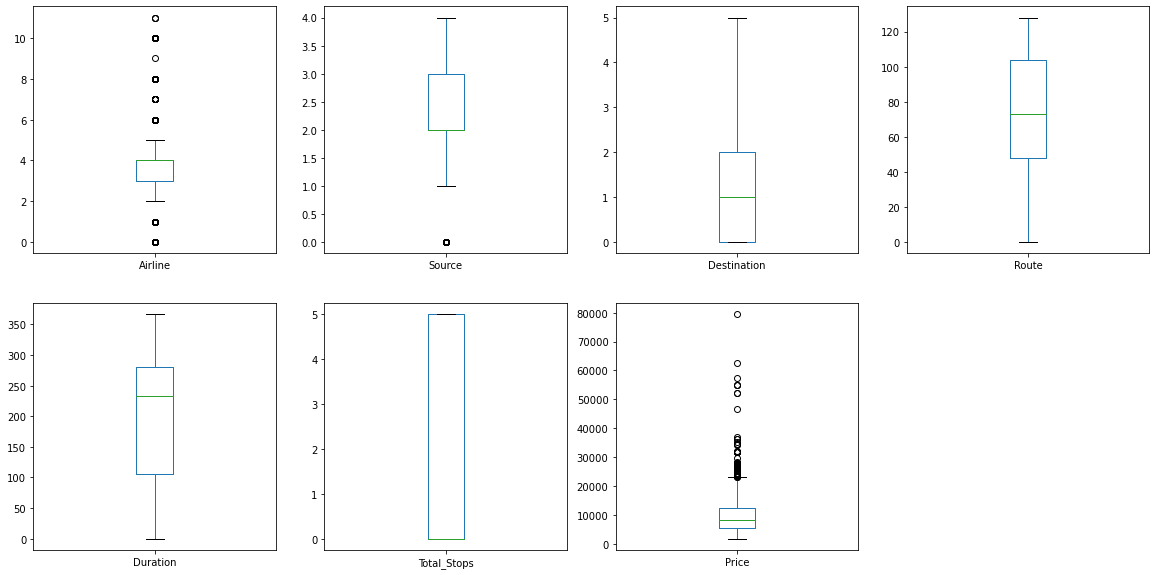

In [82]:
flight.plot(kind ='box', subplots = True, layout = (2,4), figsize = (20,10))

# Correlation

In [83]:
flight.corr()

,Airline,Source,Destination,Route,Duration,Total_Stops,Price
Airline,1.000000,-0.013401,0.018479,0.025039,0.027917,0.046130,-0.039520
Source,-0.013401,1.000000,-0.592574,0.403378,-0.192009,-0.227074,0.015998
Destination,0.018479,-0.592574,1.000000,-0.461169,0.022037,0.340446,-0.071112
Route,0.025039,0.403378,-0.461169,1.000000,-0.062111,-0.445250,0.164085
Duration,0.027917,-0.192009,0.022037,-0.062111,1.000000,0.177752,-0.144270
Total_Stops,0.046130,-0.227074,0.340446,-0.445250,0.177752,1.000000,-0.581863
Price,-0.039520,0.015998,-0.071112,0.164085,-0.144270,-0.581863,1.000000


<AxesSubplot:>

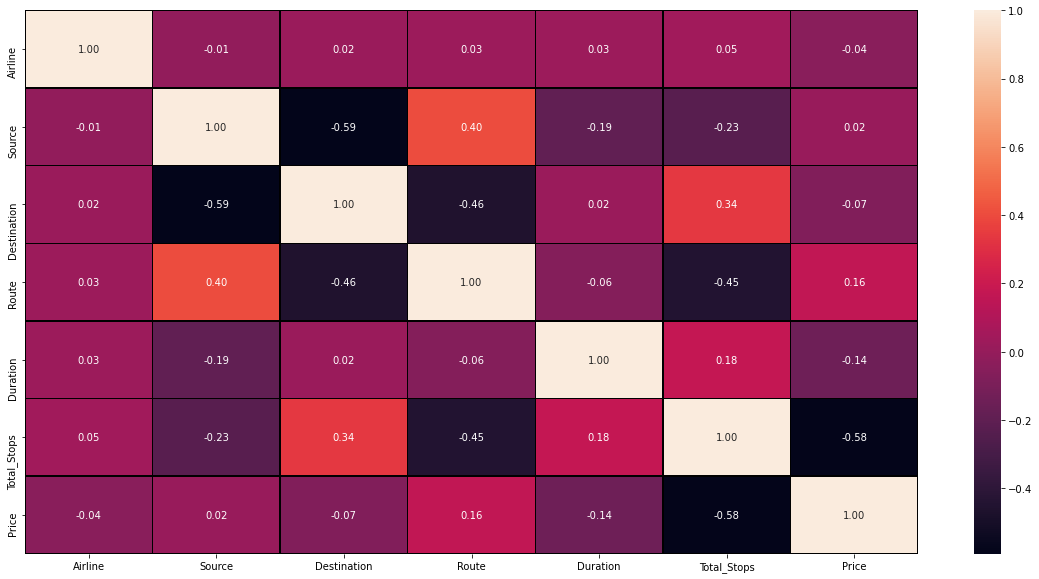

In [84]:
plt.figure(figsize = (20,10))
sns.heatmap(flight.corr(), annot = True, linewidth = .5, linecolor = 'black', fmt = '.2f')

# Normal Distribution Curve

<AxesSubplot:xlabel='Airline', ylabel='Density'>

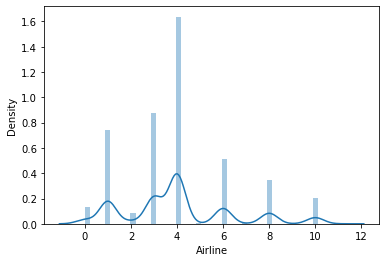

In [85]:
sns.distplot(flight['Airline'])

<AxesSubplot:xlabel='Source', ylabel='Density'>

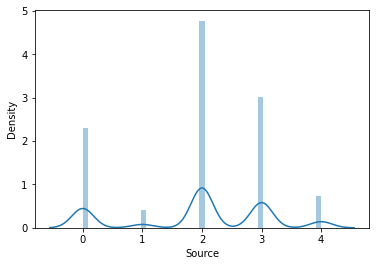

In [86]:
sns.distplot(flight['Source'])

<AxesSubplot:xlabel='Destination', ylabel='Density'>

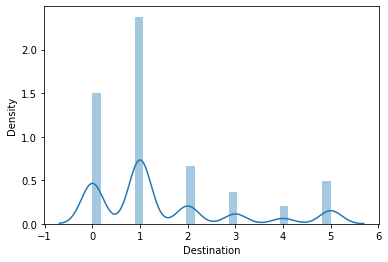

In [87]:
sns.distplot(flight['Destination'])

<AxesSubplot:xlabel='Route', ylabel='Density'>

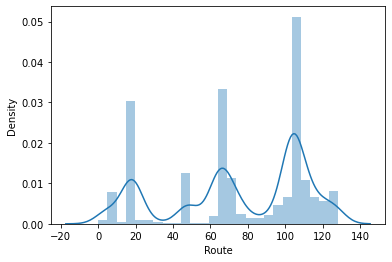

In [88]:
sns.distplot(flight['Route'])

<AxesSubplot:xlabel='Duration', ylabel='Density'>

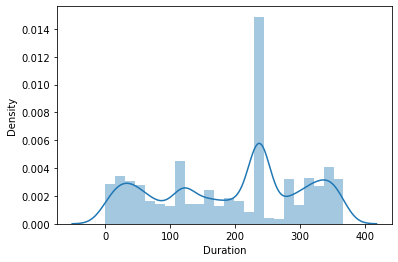

In [89]:
sns.distplot(flight['Duration'])

<AxesSubplot:xlabel='Total_Stops', ylabel='Density'>

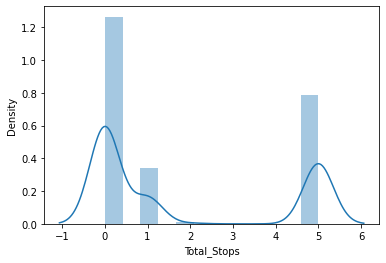

In [90]:
sns.distplot(flight['Total_Stops'])

<AxesSubplot:xlabel='Price', ylabel='Density'>

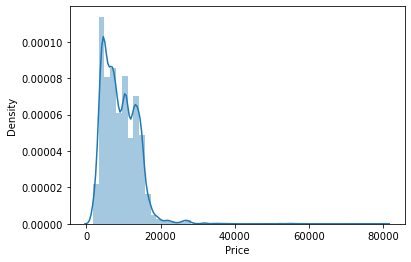

In [91]:
sns.distplot(flight['Price'])

# Outliers

In [92]:
from scipy.stats import zscore
z = np.abs(zscore(flight))
z

array([[0.41067545, 1.65844074, 2.41666505, ..., 0.42287466, 1.41743199,
        1.12554821],
       [1.26099927, 0.89005213, 0.97382594, ..., 1.30672664, 0.34623757,
        0.30904789],
       [0.01448647, 0.04055451, 0.29572775, ..., 0.81083539, 0.34623757,
        1.03985835],
       ...,
       [0.01448647, 1.65844074, 0.38237045, ..., 0.79114632, 1.41743199,
        0.40295085],
       [2.56545795, 1.65844074, 2.41666505, ..., 0.40446108, 1.41743199,
        0.77224576],
       [1.26099927, 0.04055451, 0.29572775, ..., 1.40800134, 0.34623757,
        0.57815073]])

In [93]:
threshold =3
print(np.where(z>3))

(array([  123,   396,   486,   510,   597,   628,   657,   785,   826,
         936,   946,   959,   975,  1196,  1246,  1341,  1424,  1466,
        1478,  1629,  1654,  1785,  1918,  2055,  2099,  2108,  2495,
        2556,  2618,  2635,  2693,  2924,  3032,  3111,  3257,  3400,
        3535,  3700,  4012,  4521,  4676,  4829,  5013,  5136,  5372,
        5439,  5662,  5701,  5710,  5719,  5738,  5745,  5856,  5986,
        6314,  6407,  6576,  6588,  6605,  6991,  7351,  7356,  7377,
        7537,  7554,  7617,  7713,  7724,  7756,  7902,  8020,  8080,
        8451,  8470,  8536,  8598,  8856,  8940,  8957,  8990,  9019,
        9193,  9239,  9632,  9715,  9974, 10052, 10113, 10160, 10182,
       10189, 10353, 10364, 10383, 10439, 10511], dtype=int64), array([6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 

In [94]:
flight_new = flight[(z<3).all(axis =1)]
print(flight)
print(flight_new)

       Airline  Source  Destination  Route  Duration  Total_Stops  Price
0            3       0            5     18       240            5   3897
1            1       3            0     84       336            1   7662
2            4       2            1    118       106            1  13882
3            3       3            0     91       311            0   6218
4            3       0            5     29       303            0  13302
...        ...     ...          ...    ...       ...          ...    ...
10678        0       3            0     64       236            5   4107
10679        1       3            0     64       237            5   4145
10680        4       0            2     18       280            5   7229
10681       10       0            5     18       238            5  12648
10682        1       2            1    108       347            1  11753

[10683 rows x 7 columns]
       Airline  Source  Destination  Route  Duration  Total_Stops  Price
0            3       0   

# Dividing Data in Features & Vectors

In [115]:
x = flight_new.drop(['Price'], axis =1)
y = flight_new['Price']

# Remove Skewness

In [116]:
from sklearn.preprocessing import power_transform
x = power_transform(x, method ='yeo-johnson')
x

array([[-0.29390942, -1.61362335,  1.77620166, -1.55329383,  0.4597903 ,
         1.30302303],
       [-1.41723775,  0.89766697, -1.36737828,  0.21607626,  1.24251659,
         0.28332186],
       [ 0.14822567, -0.02604514,  0.01902855,  1.20252338, -0.74940724,
         0.28332186],
       ...,
       [ 0.14822567, -1.61362335,  0.72471658, -1.55329383,  0.79203959,
         1.30302303],
       [ 2.11562497, -1.61362335,  1.77620166, -1.55329383,  0.44291416,
         1.30302303],
       [-1.41723775, -0.02604514,  0.01902855,  0.9087934 ,  1.32925994,
         0.28332186]])

# Splitting Data

In [117]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = .20, random_state = 0)

# Model

In [118]:
# Creating xgboost Model
from xgboost.sklearn import XGBRegressor

In [119]:
XGB = XGBRegressor()
XGB.fit(x_train ,y_train)
pred = XGB.predict(x_test)

In [120]:
XGB.score(x_train, y_train)

0.7693132311516986

In [121]:
lr = LinearRegression()
lr.fit(x_train, y_train)
pred1 = lr.predict(x_test)

In [122]:
lr.score(x_train, y_train)

0.3071417251397187

In [123]:
from sklearn.svm import SVR 
reg = SVR() 
reg.fit(x_train, y_train) 
pred1 = reg.predict(x_test)

In [124]:
reg.score(x_train, y_train)

0.08930742962829374

In [125]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(y_test, pred1))

In [126]:
rmse

4016.723343645343

In [132]:
# predicting on actual test data
x_t = testing
y_result = XGB.predict(x_t)

In [133]:
y_result

array([14539.625, 14539.625, 14539.625, ..., 14539.625, 17009.732,
       14539.625], dtype=float32)

# Model Saving

In [134]:
import pickle
filename = 'Flight_Price_Prediction.pkl'
pickle.dump(reg, open(filename, 'wb'))